In [152]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
import warnings
warnings.filterwarnings('ignore')

In [154]:
url='https://drive.google.com/file/d/1a1pWKh9W3jpNuSs0j8AcRsJsEBxmX4SV/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
assessments = pd.read_csv(url)

url='https://drive.google.com/file/d/10DJXVfaf1B9B9LoebzbBEV7DUrJbPh6l/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
courses = pd.read_csv(url)

url='https://drive.google.com/file/d/1Rcl06lqRpzj-5oH-Chws_-562wyNANWz/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentAssessment = pd.read_csv(url)

url='https://drive.google.com/file/d/1U_RE2G_ELFhR_YeyXt2cGF_W69Lu6IJC/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentInfo = pd.read_csv(url)

url='https://drive.google.com/file/d/1nbUgYN4WBFq_KJuFm9_vUm9je5YiZX6E/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
studentRegistration = pd.read_csv(url)

#url='https://drive.google.com/file/d/1dWdzGnVhEUQVByx3t5V-WeMxF2hbVhnt/view?usp=share_link'
#url='https://drive.google.com/uc?id=' + url.split('/')[-2]
url='https://drive.google.com/uc?export=download&confirm=yTib&id=1dWdzGnVhEUQVByx3t5V-WeMxF2hbVhnt'
studentVle = pd.read_csv(url)

url='https://drive.google.com/file/d/1A765faofjN_v8XBIXt_0BBGR1QSz1Rw4/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
vle = pd.read_csv(url)

HTTPError: ignored

# Početni pregled svih 7 tablica, pregled tipova podataka i deskriptivna statistika.

## assessments.csv

In [155]:
print(assessments.columns.values)
print(assessments.head())
print()
print(assessments.info())
print()
print(assessments.describe())
print()
print(assessments.isna().sum())
print()
print()

#ubaci srednju vrijednost 'date' tamo gdje nedostaje ta informacija
X_tmp = assessments.copy()
X_tmp.loc[X_tmp.date.isna(),'date'] = X_tmp.loc[:,'date'].mean()

#vidimo da sad nema nedostajućih vrijednosti u stupcu date
print(X_tmp.isna().sum())


['code_module' 'code_presentation' 'id_assessment' 'assessment_type'
 'date' 'weight']
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5  

## courses.csv

In [ ]:
print(courses.head())
print()
print(courses.info())
print()
print(courses.describe())
print()
print(courses.isna().sum())

## studentAssessment.csv

In [181]:
print(studentAssessment.head())
print()
print(studentAssessment.info())
print()
print(studentAssessment.describe())
print()
print(studentAssessment.isna().sum())
studentAssessment.dropna(inplace=True)
studentAssessment2 = studentAssessment[studentAssessment['id_assessment'] == 1752].drop(columns=['is_banked', 'date_submitted'])
display(studentAssessment2)

   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173739 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173739 non-null  int64  
 1   id_student      173739 non-null  int64  
 2   date_submitted  173739 non-null  int64  
 3   is_banked       173739 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 8.0 MB
None

       id_assessment    id_student  date_submitted      is_banked  \
count  173739.000000  1.737390e+05   173739.000000  173739.00000

,id_assessment,id_student,score
0,1752,11391,78.0
1,1752,28400,70.0
2,1752,31604,72.0
3,1752,32885,69.0
4,1752,38053,79.0
...,...,...,...
354,1752,2688067,70.0
355,1752,2689958,86.0
356,1752,2691206,86.0
357,1752,2694424,89.0


## studentInfo.csv

In [182]:
print(studentInfo.head())
print()
print(studentInfo.info())
print()
print(studentInfo.describe())
print()
print(studentInfo.isna().sum())
print("-------------------")
studentInfo.dropna(inplace=True)
studentInfo5 = studentInfo.drop(columns=['studied_credits', 'code_presentation', 'region', 'imd_band', 'final_result'])
display(studentInfo5)

#display(studentInfo)
studentInfo2 = studentInfo5.groupby(['id_student']).sum()
display(studentInfo2)
studentInfo3 = studentInfo5.drop(columns=['num_of_prev_attempts'])
#studentInfo.drop_duplicates(inplace=True)
#parametar keep last
studentInfo4 = pd.merge(studentInfo2, studentInfo3, on="id_student")
display(studentInfo4)



  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

,code_module,id_student,gender,highest_education,age_band,num_of_prev_attempts,disability
0,AAA,11391,M,HE Qualification,55<=,0,N
1,AAA,28400,F,HE Qualification,35-55,0,N
2,AAA,30268,F,A Level or Equivalent,35-55,0,Y
3,AAA,31604,F,A Level or Equivalent,35-55,0,N
4,AAA,32885,F,Lower Than A Level,0-35,0,N
...,...,...,...,...,...,...,...
32588,GGG,2640965,F,Lower Than A Level,0-35,0,N
32589,GGG,2645731,F,Lower Than A Level,35-55,0,N
32590,GGG,2648187,F,A Level or Equivalent,0-35,0,Y
32591,GGG,2679821,F,Lower Than A Level,35-55,0,N


,num_of_prev_attempts
id_student,
3733,0
6516,0
8462,1
11391,0
23629,2
...,...
2698591,0
2702660,0
2707979,0


,id_student,num_of_prev_attempts,code_module,gender,highest_education,age_band,disability
0,3733,0,DDD,M,HE Qualification,55<=,N
1,6516,0,AAA,M,HE Qualification,55<=,N
2,8462,1,DDD,M,HE Qualification,55<=,N
3,8462,1,DDD,M,HE Qualification,55<=,N
4,11391,0,AAA,M,HE Qualification,55<=,N
...,...,...,...,...,...,...,...
31477,2702660,0,FFF,F,Lower Than A Level,0-35,N
31478,2707979,0,DDD,F,Lower Than A Level,0-35,N
31479,2710343,1,DDD,M,Lower Than A Level,0-35,N
31480,2710343,1,DDD,M,Lower Than A Level,0-35,N


## studentRegistration.csv

In [186]:
print(studentRegistration.head())
print()
print(studentRegistration.info())
print()
print(studentRegistration.describe())
print()
print(studentRegistration.isna().sum())
studentRegistration.drop(columns=['code_module'], inplace=True)

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   code_module          32593 non-null  object 
 1   code_presentation    32593 non-null  object 
 2   id_student           32593 non-null  int64  
 3   date_registration    32548 non-null  float64
 4   date_unregistration  10072 non-null  fl

## studentVle.csv

In [173]:
print(studentVle.head(15))
print()
print(studentVle.info())
print()
print(studentVle.describe())
print()
print(studentVle.isna().sum())
studentVle2 = studentVle[studentVle['date'] < 0]
studentVle3 = studentVle2.groupby(['id_student']).sum()
display(studentVle3)
studentVle3.drop(columns=['id_site', 'date'],inplace=True)
display(studentVle3)


   code_module code_presentation  id_student  id_site  date  sum_click
0          AAA             2013J       28400   546652   -10          4
1          AAA             2013J       28400   546652   -10          1
2          AAA             2013J       28400   546652   -10          1
3          AAA             2013J       28400   546614   -10         11
4          AAA             2013J       28400   546714   -10          1
5          AAA             2013J       28400   546652   -10          8
6          AAA             2013J       28400   546876   -10          2
7          AAA             2013J       28400   546688   -10         15
8          AAA             2013J       28400   546662   -10         17
9          AAA             2013J       28400   546890   -10          1
10         AAA             2013J       28400   547011   -10          1
11         AAA             2013J       28400   547013   -10          1
12         AAA             2013J       28400   546871   -10          3
13    

,id_site,date,sum_click
id_student,,,
6516,46485677,-692,256
8462,14823015,-71,81
11391,6013476,-55,98
23629,1628480,-18,14
23698,50911979,-407,181
...,...,...,...
2697921,30322484,-489,104
2698125,6449201,-153,14
2698251,62622941,-893,174


,sum_click
id_student,
6516,256
8462,81
11391,98
23629,14
23698,181
...,...
2697921,104
2698125,14
2698251,174


## vle.csv

In [ ]:
print(vle.head())
print()
print(vle.info())
print()
print(vle.describe())
print()
print(vle.isna().sum())
vle.drop(columns =['week_from', 'week_to'], inplace=True)

# Vizualizacije

In [ ]:
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(5)
plt.hist(studentInfo.age_band)
plt.show()

In [ ]:
count_per_education = studentInfo.groupby('highest_education').count().loc[:,'id_student'].values
education_student = studentInfo.groupby('highest_education').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.pie(count_per_education, labels=education_student, autopct='%.1f')
plt.show()

In [ ]:
count_per_education = studentInfo.groupby('highest_education').count().loc[:,'id_student'].values
education_student = studentInfo.groupby('highest_education').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.bar(education_student, count_per_education, color='yellow')
plt.show()

In [ ]:
#mask_disability = studentInfo.disability == 'N'


#count_per_education_nodis = studentInfo.loc[~mask_disability,:].groupby('highest_education').count().loc[:,'id_student'].values
#count_per_education_dis = studentInfo.loc[mask_disability,:].groupby('highest_education').count().loc[:,'id_student'].values
#educ_stud = studentInfo.groupby('highest_education').count().index.values

# plot
#plt.bar(educ_stud, count_per_education_dis, color='green', label='no disability')
#plt.bar(educ_stud, count_per_education_nodis, color='red', label='with disability', bottom=count_per_education_nodis)
#plt.legend(loc='best')
#plt.grid()
#plt.show()



In [ ]:
count_per_final_result = studentInfo.groupby('final_result').count().loc[:,'id_student'].values
title_name = studentInfo.groupby('final_result').count().index.values

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(5)
plt.bar(title_name, count_per_final_result)
plt.show()

In [ ]:
count_per_gender = studentInfo.groupby('gender').count().loc[:,'id_student'].values
title_name = studentInfo.groupby('gender').count().index.values

plt.bar(title_name, count_per_gender, color='green')
plt.show()

In [ ]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)
plt.boxplot(studentVle.sum_click)
plt.show()

# Joinanje tablica

In [193]:
tablica = pd.merge(studentAssessment2, studentInfo5, on="id_student")
tablica = pd.merge(tablica, studentRegistration, on="id_student")
tablica = pd.merge(tablica, studentVle3, on="id_student")
tablica.drop(columns=['code_module', 'id_assessment', 'id_student', 'code_presentation', 'date_unregistration' ], inplace=True)

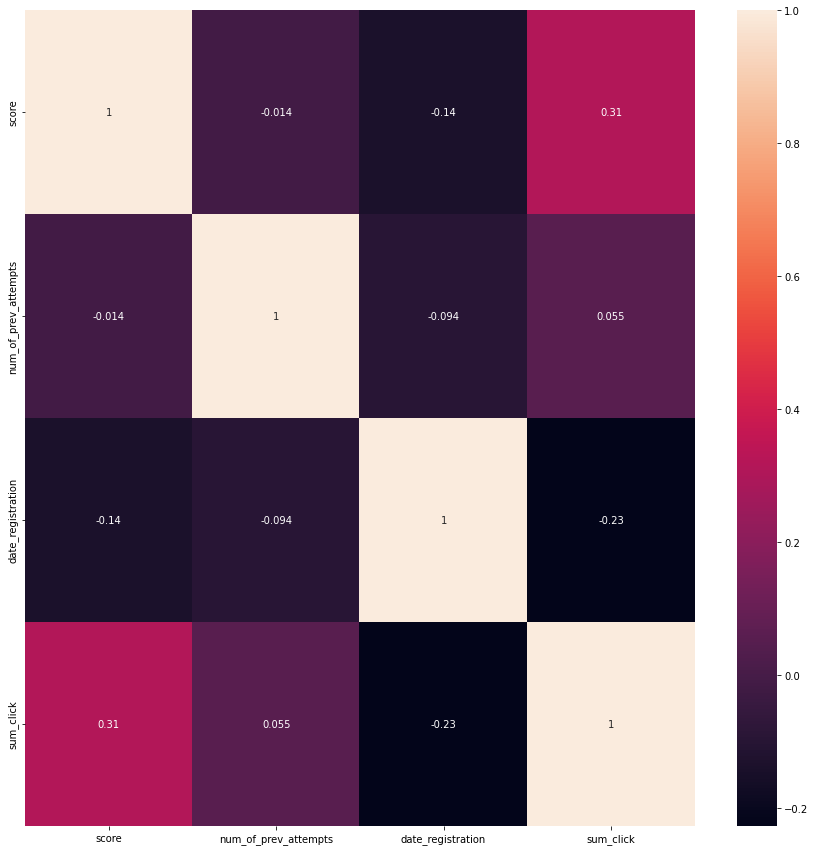

In [195]:
corrMatrix = tablica.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corrMatrix, annot=True)
plt.show()